In [2]:
import pandas as pd
import matplotlib.pyplot as plt

This Notebook uses the *grouped* version of event observations produced in `apply-loading-matrix.ipynb` to perform cohort analysis. 

Group metrics are often more useful than individual metrics for a number of reasons:

- Different metrics provide different ways of looking at the same area of activity that can substitute for one another. If a customer does not use a particular product feature but instead uses a related one, the average picks it up either way.
- Looking at too many metrics can lead to information overload. Behavioural metrics do not usually measure something that is directly causal of churn or retention. It is more common that they are only associted with churn.
- Averaging together groups of metrics further reduces random variation and make the underlying relationship between churn and a set of behaviours clearer. 

The procedure is the same as in `metric-cohorts.ipynb`:

1. Using the metric (or group) and the variable representing churn or non-churn, sort the observations by value.
2. Group the observations into cohorts by dividing the observations into equal-sized groups (we default to deciles).
3. For each cohort, calculate:
    - the average value of the metric (or group) for all observations in the cohort
    - the percentage of churns in the cohort observations
4. Plot the average metric (or group) values and churn rates.

Sometimes, a customer appears more than once in one cohort;
at other times, the same customer appears in different cohorts. This makes sense because we're investigating the hypothesis that the behaviour represented by the metric is related to churn, not that the identity of the customer or the timing of the observation is related to churn. 

In [3]:
scored_data_set_path = '../../output/socialnet_dataset_groupscore.csv'
churn_data_scored = pd.read_csv(scored_data_set_path, index_col=[0, 1])

In [6]:
# List of column names which contain 'metric_group' or '_per_month' (captures metric groups and individual metrics)
per_month_metrics = churn_data_scored.filter(regex='metric_group|_per_month$').columns.to_list()

In [11]:
# produce a cohort analysis dataframe for the chosen metric
def create_cohort_frame(df, metric_to_plot, ncohort=10):
    # group into cohorts and return a series of the group numbers
    groups = pd.qcut(df[metric_to_plot], ncohort, duplicates='drop')
    # calculate the mean metric value for each cohort
    cohort_means = df.groupby(groups)[metric_to_plot].mean()
    # calculate the churn rate for each cohort
    cohort_churns = df.groupby(groups)['is_churn'].mean()
    # msk a new DataFrame from the cohorts
    plot_frame = pd.DataFrame({
        metric_to_plot: cohort_means.values,
        'churn_rate': cohort_churns
        })
    return plot_frame
    
def cohort_plot(plot_frame, metric_to_plot, ax, scored=False):
    ax.plot(metric_to_plot, 
             'churn_rate',
             data=plot_frame,
             marker='o',
             linewidth=2,
             label=metric_to_plot)
    ax.grid()
    ax.set_ylim(bottom=0)
    if not scored:
        ax.set_xlim(left=0)

### Cohorts of behaviour metrics

With 10 cohorts, each cohort will have about 930 observations, so we can be confident that the noise of random events won't overwhelm the signal we're looking for.

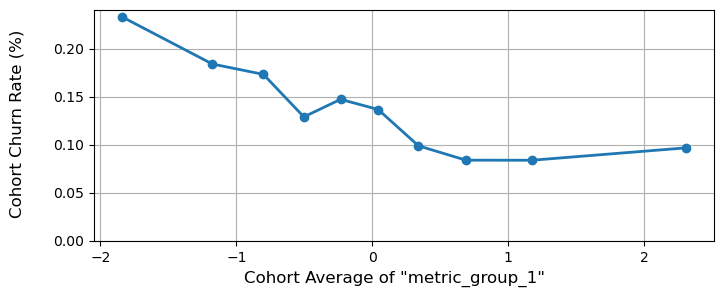

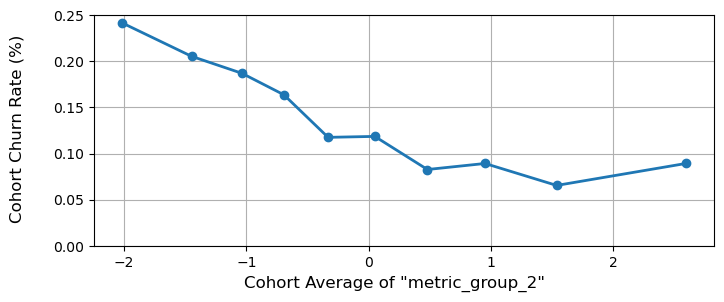

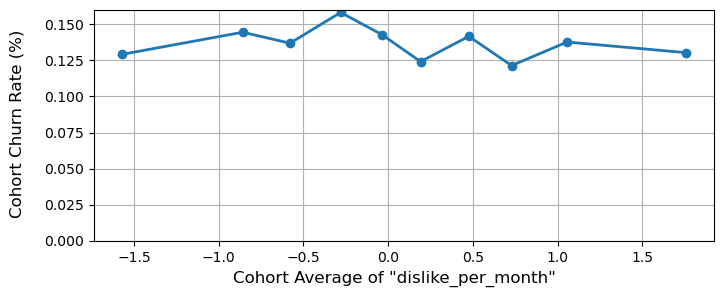

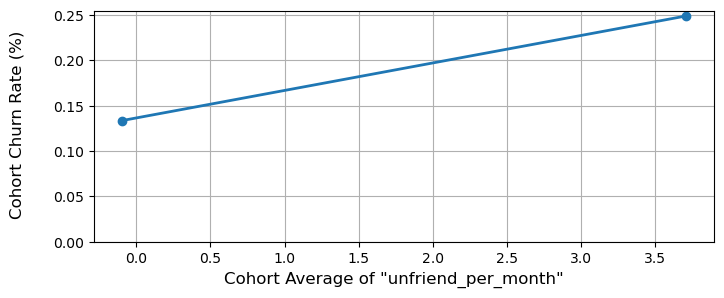

: 

In [12]:
# produce plots of cohort analysis for each of our metric groups and metrics:
for metric_name in per_month_metrics:
    fig, axs = plt.subplots(1, 1, figsize=(8, 3))
    plot_frame_scored = create_cohort_frame(churn_data_scored, metric_name)
    cohort_plot(plot_frame_scored, metric_name, axs, scored=True)
    fig.supxlabel('Cohort Average of "%s"' % metric_name, va='top')
    fig.supylabel('Cohort Churn Rate (%)')
    plt.show()

For our grouped metrics, we see more a stronger, more obvious relationship with churn rate than when we considered those groups' metrics on their own in `metric-cohorts.ipynb`.